In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit #argumentos (function,xdata,ydata)

## Funções de ajuste e auxiliares

In [2]:
def linearf(x, m, b):
    return m * x + b

def r2(y, ymodel):
    yMean = np.mean(y)
    SSres = np.sum( (y - ymodel)**2 )
    SStot = np.sum( (y - yMean)**2 )
    return 1 - SSres/SStot

# Parte 1
## Calibração
Daqui retira-se uma relação entre $B$ e $I$ para se usar mais tarde, uma vez que $I$ será controlado mas $B$ não.

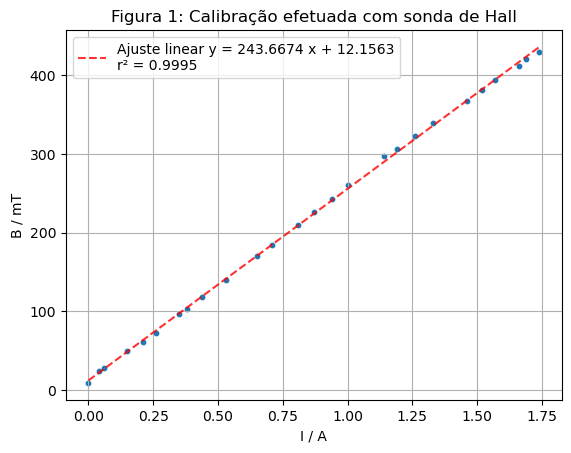

1.74


In [3]:
data1 = pd.read_csv('DadosCSV/parte1.csv', delimiter = '\t')

#esta parte é de calibração
I1 = np.array(data1['I(A)'][:26])
B1 = np.array(data1['mT'][:26])

params1, covari1 = curve_fit(linearf, I1, B1) 
label1 = f"Ajuste linear y = {params1[0]:.4f} x + {params1[1]:.4f}\nr² = {r2(B1, linearf(I1, params1[0], params1[1])):.4f}"

plt.title('Figura 1: Calibração efetuada com sonda de Hall')

plt.plot(I1, linearf(I1, params1[0], params1[1]), color = 'r', ls = '--', alpha = 0.8, label = label1)
plt.scatter(I1,B1, s= 10)

plt.xlabel('I / A')
plt.ylabel('B / mT')
plt.grid()
plt.legend()
plt.show()

print(data1['I(A)'][25]) #por causa disto cortam-se os dados pra apanhar na gama de interesse

In [4]:
print(params1)
print(np.sqrt(covari1[0,0])*3,np.sqrt(covari1[1,1])*3)


[243.66738054  12.15632014]
3.298793739662889 3.344307730571311


# Parte 2
## Amostra com campo magnético fixo; variação da corrente

A partir da expressão $$U_H = \frac{d}{S}\frac{1}{n q} I B \sin(\theta)$$
Determina-se, sabendo que $\theta=\frac{\pi}{2}$, o coeficiente de Hall, dado por: $$R_H = \frac{1}{nq}$$
As dimensões dadas pelo enunciado são:
$$2cm \times 1cm \times 2.12 mm$$

In [5]:
S = 2

data2 = pd.read_csv('DadosCSV/parte2.csv', delimiter='\t')

data2.head()

,Ip(mA),Uh(mV),Vp(V)
0,-20,-30.642,-1.023
1,-19,-29.670,-0.990
2,-18,-27.800,-0.929
3,-17,-26.880,-0.898
4,-16,-25.642,-0.857


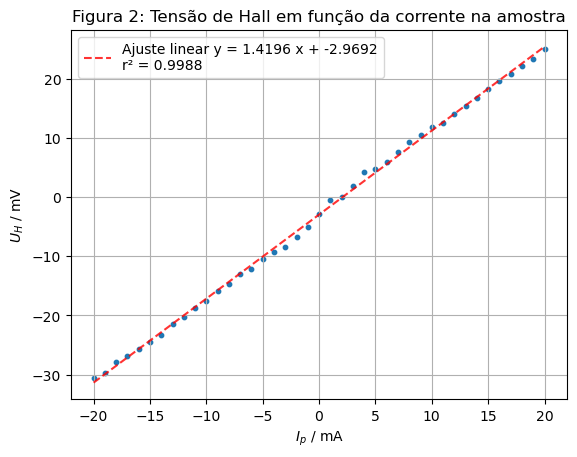

In [6]:
#será que trabalho com SI deste o início?

I2 = np.array(data2['Ip(mA)']) #mA
U2 = np.array(data2['Uh(mV)']) #mV
V2 = np.array(data2['Vp(V)']) #V

params2, covari2 = curve_fit(linearf, I2, U2) 
label2 = f"Ajuste linear y = {params2[0]:.4f} x + {params2[1]:.4f}\nr² = {r2(U2, linearf(I2, params2[0], params2[1])):.4f}"

plt.title('Figura 2: Tensão de Hall em função da corrente na amostra')

plt.plot(I2, linearf(I2, params2[0], params2[1]), color = 'r', ls = '--', alpha = 0.8, label = label2)
plt.scatter(I2,U2, s= 10)

plt.xlabel('$I_p$ / mA')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

Aqui em baixo faz-se um gráfico de $V_p(I_p)$ que suponho que deverá ser linear pela lei de Ohm.

In [7]:
print(params2)
print(np.sqrt(covari2[0,0])*3,np.sqrt(covari2[1,1])*3)

[ 1.41960547 -2.96916585]
0.023373835953097867 0.2765629505213435


In [8]:
#obter B durante a parte 2:
B2 = 1.02*params1[0] + params1[1]
B2

np.float64(260.69704828886574)

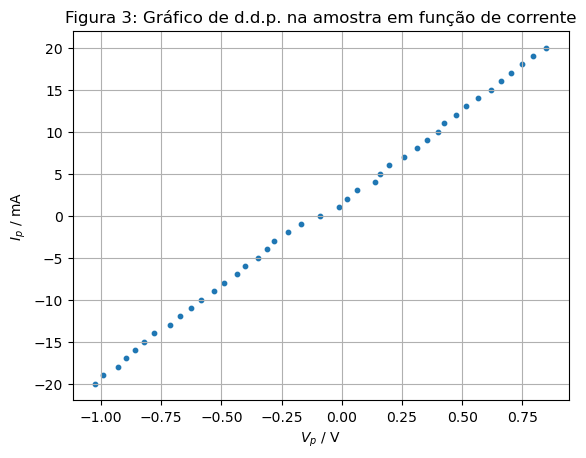

In [9]:
plt.title('Figura 3: Gráfico de d.d.p. na amostra em função de corrente')
plt.scatter(V2,I2, s= 10)
plt.ylabel('$I_p$ / mA')
plt.xlabel('$V_p$ / V')
plt.grid()
plt.show()

## Parte 3

Agora vai-se obter a relação entre a tensão de Hall e o campo magnético criado pelas bobinas.

Para isso, mediu-se a corrente $I_b$ e, usando o modelo $B(I)$, converteu-se essa corrente em campo magnético.

In [10]:
def BI(I): #recebe a corrente e dá o campo que deve estar a ser gerado
    return params1[0]*I + params1[1]

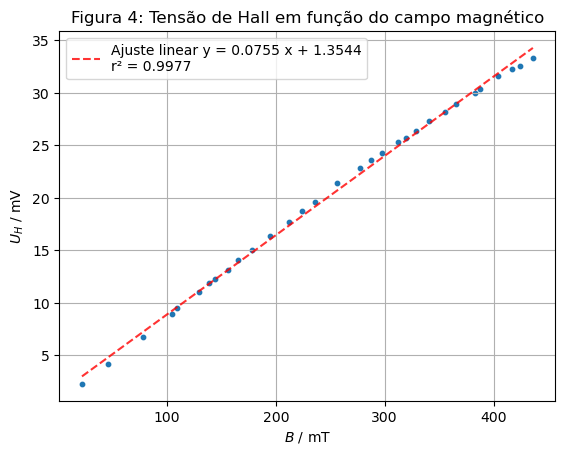

In [11]:
data3 = pd.read_csv('DadosCSV/parte3.csv', delimiter='\t')

#Relembro que só se tem o modelo de B(I) até 1.74 (aumentei um pouco porque ainda era linear nessa zona, então vou cortar os pontos de I superiores a esse


I3 = np.array(data3['Ib(A)'][:-2]) #mA
B3 = BI(I3)
U3 = np.array(data3['Uh(mV)'][:-2]) #mV
V3 = np.array(data3['Up(V)'][:-2]) #V

params3, covari3 = curve_fit(linearf, B3, U3)

label3 = f"Ajuste linear y = {params3[0]:.4f} x + {params3[1]:.4f}\nr² = {r2(U3, linearf(B3, params3[0], params3[1])):.4f}"

plt.title('Figura 4: Tensão de Hall em função do campo magnético')

plt.plot(B3, linearf(B3, params3[0], params3[1]), color = 'r', ls = '--', alpha = 0.8, label = label3)
plt.scatter(B3,U3, s= 10)

plt.xlabel('$B$ / mT')
plt.ylabel('$U_H$ / mV')
plt.grid()
plt.legend()
plt.show()

In [12]:
print(params3)
print(np.sqrt(covari3[0,0])*3,np.sqrt(covari3[1,1])*3)

[0.07547683 1.35439277]
0.0020399805675746186 0.5630569869605844


## Parte 4

Fez-se variar a temperatura, fixando $I_b= 1 \space A$ e $I_p = 18 \space mA$ (corrente nas bobinas e na amostra, respetivamente). O vídeo foi gravado pelo telemóvel do Miguel, e em casa anotou-se os valores de $U_h$, em $mV$, e a tensão na amostra $V_p$, que variava com a temperatura.

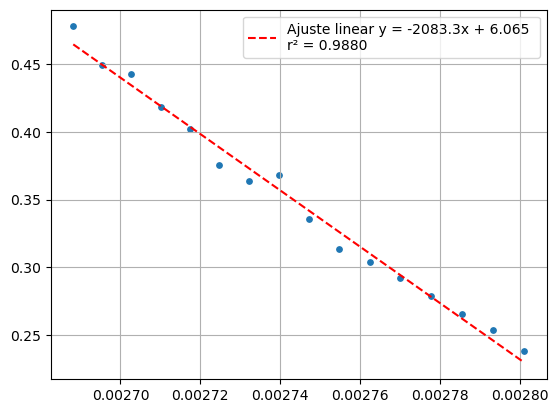

[-2083.26766244     6.06497709]
184.1799094033765 0.5054159468725726


np.int64(99)

In [168]:
data4 = pd.read_csv('DadosCSV/parte4.csv', delimiter=';')

T4 = np.array(data4['T(K)']) #K
U4 = np.array(data4['Uh(mV)']) #mV
V4 = np.array(data4['V(mV)'])/1000 #V

N = 16
fV = -np.log(V4[:N])
fT = 1/T4[:N]

params4, covari4 = curve_fit(linearf, fT, fV)

plt.scatter(fT, fV, s = 15)
plt.grid()
plt.plot(fT, linearf(fT, params4[0], params4[1]), color = "r", ls = "--", 
        label = f"Ajuste linear y = {params4[0]:.1f}x + {params4[1]:.3f} \nr² = {r2(fV, linearf(fT, params4[0], params4[1])):.4f}")
plt.legend()

plt.show()
print(params4)
print(np.sqrt(covari4[0,0])*3,np.sqrt(covari4[1,1])*3)

max(T4)-273

In [102]:
params4[0]*(-2)*8.625e-5

np.float64(0.3593636717703446)

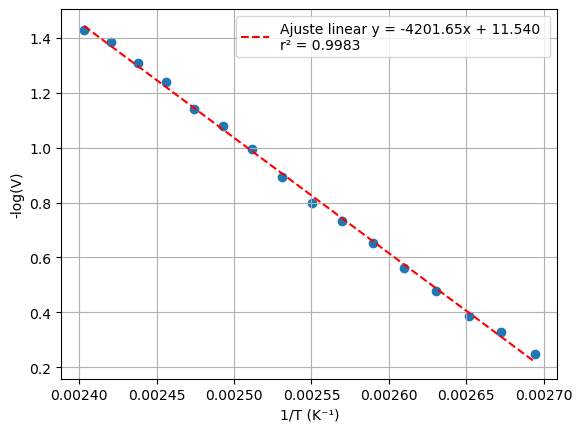

[-4201.65077613    11.5401409 ]
140.45096080839966 0.3574538136735614


np.float64(0.3623923794414873)

In [170]:
bunny = pd.read_csv("DadosCSV/PARTE_D.txt", delimiter = "\t", header = None)
V5 = bunny[2]
T5 = bunny[4] + 273.15
N = 16
fV5 = np.log(1/V5[:N])
fT5 = 1/T5[:N]

params5, covari5 = curve_fit(linearf, fT5, fV5)
plt.scatter(fT5,fV5)
plt.plot(fT5, linearf(fT5, params5[0], params5[1]), color = "r", ls = "--", 
        label = f"Ajuste linear y = {params5[0]:.2f}x + {params5[1]:.3f} \nr² = {r2(fV5, linearf(fT5, params5[0], params5[1])):.4f}")
plt.legend()
plt.grid()
plt.ylabel("-log(V)")
plt.xlabel("1/T (K⁻¹)")
plt.show()

print(params5)
print(np.sqrt(covari5[0,0])*3,np.sqrt(covari5[1,1])*3)
kb = 8.625e-5
params5[0]*(-2)*kb/2

In [171]:
140*kb/2

0.0060374999999999995

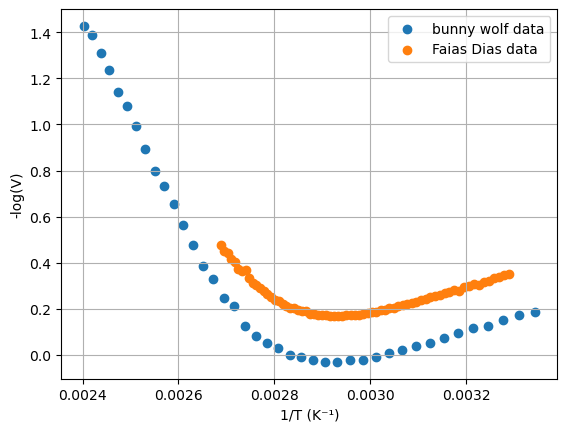

In [166]:
plt.scatter(1/T5,-np.log(V5), label = "bunny wolf data")
plt.scatter(1/T4, -np.log(V4), label = "Faias Dias data")
plt.grid()
plt.ylabel("-log(V)")
plt.xlabel("1/T (K⁻¹)")
plt.legend()
plt.show()

In [174]:
bunny

,0,1,2,3,4
0,20,-1.585,0.24,1,143
1,20,-1.658,0.25,1,140
2,20,-1.766,0.27,1,137
3,20,-1.857,0.29,1,134
4,20,-1.927,0.32,1,131
5,20,-1.966,0.34,1,128
6,20,-1.957,0.37,1,125
7,20,-1.877,0.41,1,122
8,20,-1.671,0.45,1,119
9,20,-1.418,0.48,1,116
